In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import resize
from scipy.fft import fft, ifft

In [ ]:
# RBG to Grayscale: G = 0.2989 R + 0.5870 G + 0.1140 B 
def rgbToGray(img):
  return np.dot(img[...,:3],[0.2989,0.5870,0.1140])

In [ ]:
img = cv2.imread('Fig304.tif')
img = rgbToGray(img)

In [ ]:
def fft2d(img):
  matrizAux = np.zeros_like(img, dtype = 'complex_')
  tam = img.shape[0]

  for i in range(0,tam):
    matrizAux[i] = fft(img[i])

  tam2 = img.shape[1]
  matriz = np.zeros_like(matrizAux, dtype = 'complex_')


  for i in range(0, tam2):
    matriz[:,i] = fft(matrizAux[:,i])
  
  return matriz

def ifft2d(img):
  matrizAux = np.zeros_like(img, dtype = 'complex_')
  tam = img.shape[0]

  for i in range(0,tam):
    matrizAux[i] = ifft(img[i])

  tam2 = matrizAux.shape[1]
  matriz = np.zeros_like(matrizAux, dtype = 'complex_')

  for i in range(0, tam2):
    matriz[:,i] = ifft(matrizAux[:,i])
  
  return matriz

def compress(freq, factor):
  dc = np.abs(freq[0][0])
  matriz = np.zeros_like(freq)
  for i in range(0, freq.shape[0]):
    for j in range(0, freq.shape[1]):
      if (np.abs(freq[i][j]) >= (dc*factor)):
        matriz[i][j] = freq[i][j]
  
  return matriz

def factorOfEnergy(freqOriginal, freqCompress):
  sum1 = 0
  for i in freqOriginal:
    for j in i:
      sum1 = np.abs(j) * np.abs(j) + sum1
  
  sum2 = 0
  for i in freqCompress:
    for j in i:
      sum2 = np.abs(j) * np.abs(j) + sum2

  return (sum2/sum1)

def factorOfNoZeros(freqOriginal, freqCompress):
  non_zeros_original = np.count_nonzero(freqOriginal)
  non_zeros_compress = np.count_nonzero(freqCompress)
  print(str(non_zeros_original)+' non-zeros in the original image and '+str(non_zeros_compress) + ' non-zeros in the compressed image')
  return (non_zeros_compress/non_zeros_original)



In [ ]:
myFreqOriginal = (fft2d(img))

In [ ]:
myFreqCompress1 = (compress(myFreqOriginal, 0.1))
myFreqCompress2 = (compress(myFreqOriginal, 0.001))
myFreqCompress3 = (compress(myFreqOriginal, 0.00001))

Imagem original


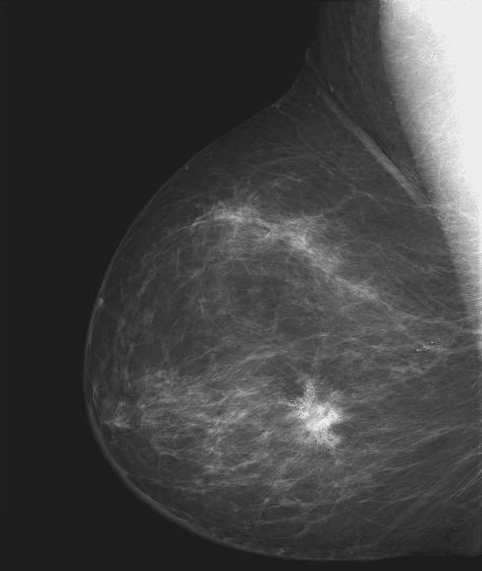

In [ ]:
print('Imagem original')
cv2_imshow(img)

Imagem 0.1 DC:
0.8574020566538256
275222 não-zeros na imagem original e 13 não-zeros na imagem compressa
4.723459607153498e-05


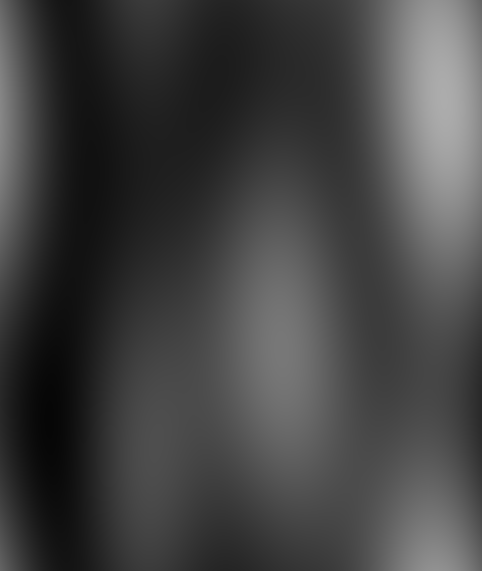

In [ ]:
print('Imagem 0.1 DC:')
print(factorOfEnergy(myFreqOriginal,myFreqCompress1))
print(factorOfNoZeros(myFreqOriginal,myFreqCompress1))
cv2_imshow(np.abs(ifft2d(myFreqCompress1)))

Imagem 0.001 DC:
0.9949053049568658
275222 não-zeros na imagem original e 4158 não-zeros na imagem compressa
0.015107803881957111


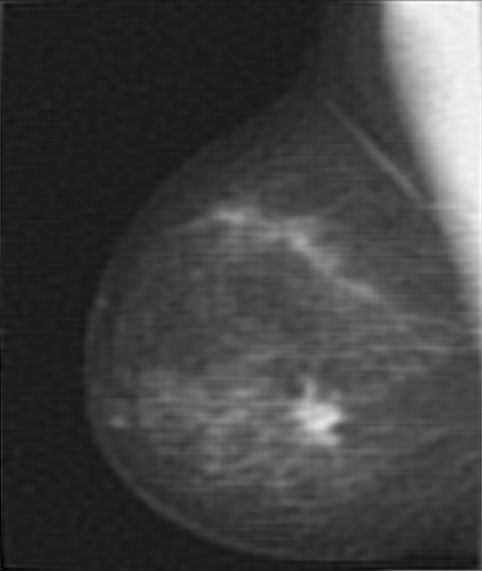

In [ ]:
print('Imagem 0.001 DC:')
print(factorOfEnergy(myFreqOriginal,myFreqCompress2))
print(factorOfNoZeros(myFreqOriginal,myFreqCompress2))
cv2_imshow(np.abs(ifft2d(myFreqCompress2)))

Imagem 0.00001 DC:
0.999999762261952
275222 não-zeros na imagem original e 268006 não-zeros na imagem compressa
0.9737811657498311


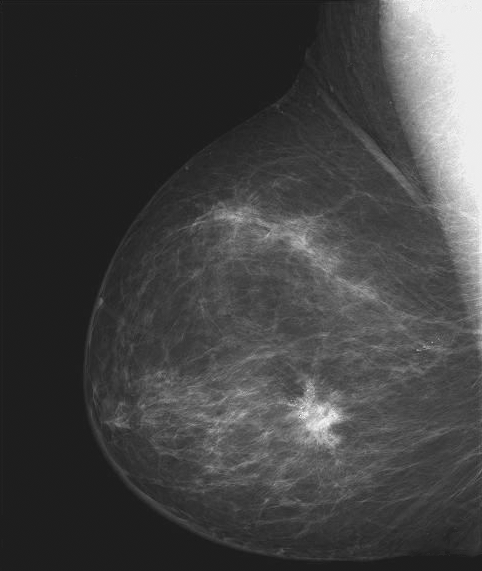

In [ ]:
print('Imagem 0.00001 DC:')
print(factorOfEnergy(myFreqOriginal,myFreqCompress3))
print(factorOfNoZeros(myFreqOriginal,myFreqCompress3))
cv2_imshow(np.abs(ifft2d(myFreqCompress3)))

Imagem original


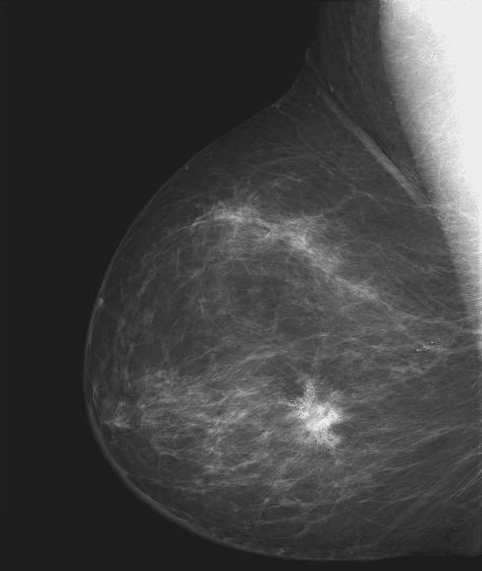

Imagem 0.0001 DC:
0.9996537326564875
275222 não-zeros na imagem original e 91502 não-zeros na imagem compressa
0.3324661545951995


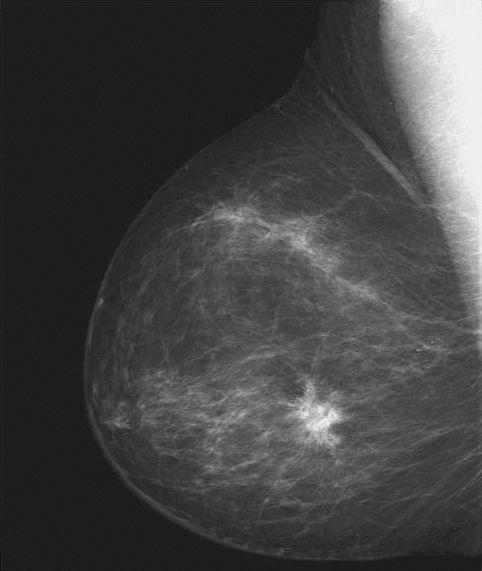

In [ ]:
imgFinal = (compress(myFreqOriginal, 0.0001))
print('Imagem original')
cv2_imshow(img)
print('Imagem 0.0001 DC:')
print(factorOfEnergy(myFreqOriginal,imgFinal))
print(factorOfNoZeros(myFreqOriginal,imgFinal))
cv2_imshow(np.abs(ifft2d(imgFinal)))